### 이상치 데이터 처리
- 피처/ 특성에 데이터 값의 범위를 벗어나는 데이터를 의미

- 종류 : 잘못 입력된 경우, 자연적으로 생성된 데이터.
    * 잘못 입력된 데이터 : 입력 시 오타 => 제거 또는 대체
    * 자연 생성 데이터 : 연봉, 키, 몸무게, 나이 => 분리해서 전용 모델 / 식별용 피처
- 탐지 : 
    * 시각화로 확인
    * 데이터의 분포 확인 : Z-Score / IQR (Turkey Fences)
- 처리 : 
    * 삭제 / 대체 / 분리 모델 / 파생 변수 추가

(1) 모듈 로딩 및 데이터 준비
<hr>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# 임의의 데이터
dataDF=pd.DataFrame({'num' : [1,4,3,2,3,4,5,-14,2,1,15]})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     11 non-null     int64
dtypes: int64(1)
memory usage: 216.0 bytes


(2) 데이터 전처리
<hr>

(2-1) 데이터 확인

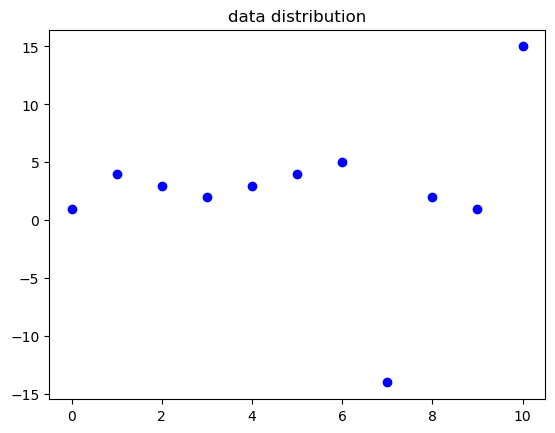

In [28]:
# 시각화로 데이터 분포 확인
plt.plot(dataDF, 'bo')
plt.title('data distribution')
plt.show()

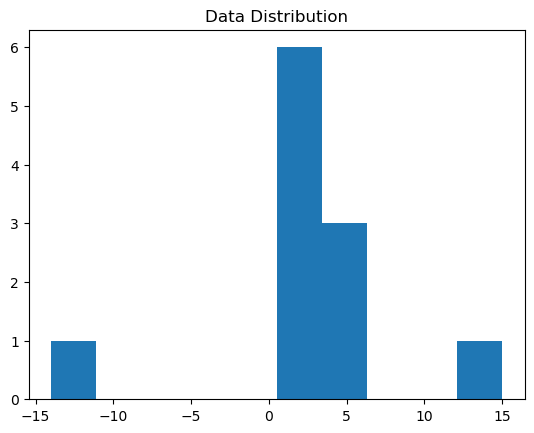

In [29]:
plt.hist(dataDF)
plt.title('Data Distribution')
plt.show()

(2-2) 불필요 데이터 체크 = > 결측치, 이상치

In [30]:
# 결측치 
dataDF.isnull().sum()

num    0
dtype: int64

In [31]:
# 이상치 탐지 - 방법 (1) 평균과 편차를 이용한 탐지 Z-score
# Z-Score = 데이터 - 평균 / 표준편차
mean_values = dataDF.mean()
std_values = dataDF.std()

zdata = (dataDF-mean_values)/std_values

In [32]:
# 양끝단 제거를 위한 기준값 (threadhold?) => 1.0
base = 1.0
mask = zdata.abs() > base

In [38]:
dataDF[~mask].dropna(inplace=True)
dataDF

,num
0,1
1,4
2,3
3,2
4,3
5,4
6,5
7,-14
8,2
9,1


In [53]:
# 이상치 탐지 = 방법(2) 데이터를 4등분해서 가운데 데이터를 기준으로 이상치 탐지
q1 = dataDF.quantile(0.25) #   Q1 
q3 = dataDF.quantile(0.75) #   Q3 
iqr = q3-q1
lower = q1-(iqr*1.5) # 무조건 1.5를 쓰는 것이 아님.
upper = q3+(iqr*1.5)

In [54]:
print(f'q1:{q1},\n\nq2:{q3}\n\niqr :{iqr}')
print(f'lower:{lower}\nupper:{upper}')

q1:num    1.5
Name: 0.25, dtype: float64,

q2:num    4.0
Name: 0.75, dtype: float64

iqr :num    2.5
dtype: float64
lower:num   -2.25
dtype: float64
upper:num    7.75
dtype: float64


In [60]:
dataDF<lower,dataDF>upper


(      num
 0   False
 1   False
 2   False
 3   False
 4   False
 5   False
 6   False
 7    True
 8   False
 9   False
 10  False,
       num
 0   False
 1   False
 2   False
 3   False
 4   False
 5   False
 6   False
 7   False
 8   False
 9   False
 10   True)

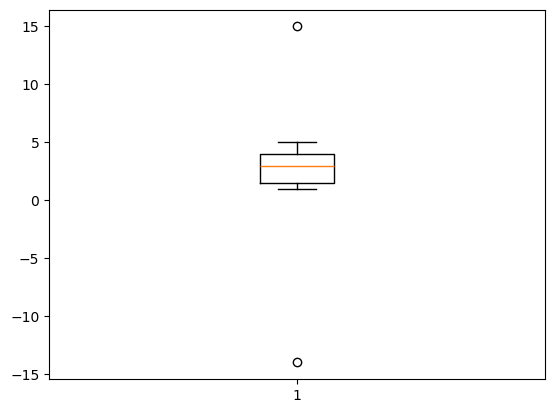

In [70]:
# 시각화
bp_obj = plt.boxplot(dataDF)
plt.show()

In [72]:
bp_obj.keys()
print(bp_obj)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001D7E8C82520>, <matplotlib.lines.Line2D object at 0x000001D7E8C827F0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001D7E8C82A90>, <matplotlib.lines.Line2D object at 0x000001D7E8C82D30>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001D7E8C82280>], 'medians': [<matplotlib.lines.Line2D object at 0x000001D7E8C82F70>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001D7E8C8B250>], 'means': []}


In [78]:
# q1, min, q3, max ... X축에 있는 값
bp_obj['whiskers'][0].get_ydata(), bp_obj['whiskers'][1].get_ydata()

(array([1.5, 1. ]), array([4., 5.]))

In [77]:
bp_obj['medians'][0].get_ydata() # 가운데 값

array([3., 3.])

In [76]:
bp_obj['boxes'][0].get_ydata()

array([1.5, 1.5, 4. , 4. , 1.5])

In [ ]:
def clean_data():
    pass